# Plain multiplication

In [1]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

In [2]:
output = (
    inputs[0]*weights[0] +
    inputs[1]*weights[1] +
    inputs[2]*weights[2] + bias
)
print(output)

2.3


# The dot product

The dot product returns a scalar.
The cross product returns a vector.

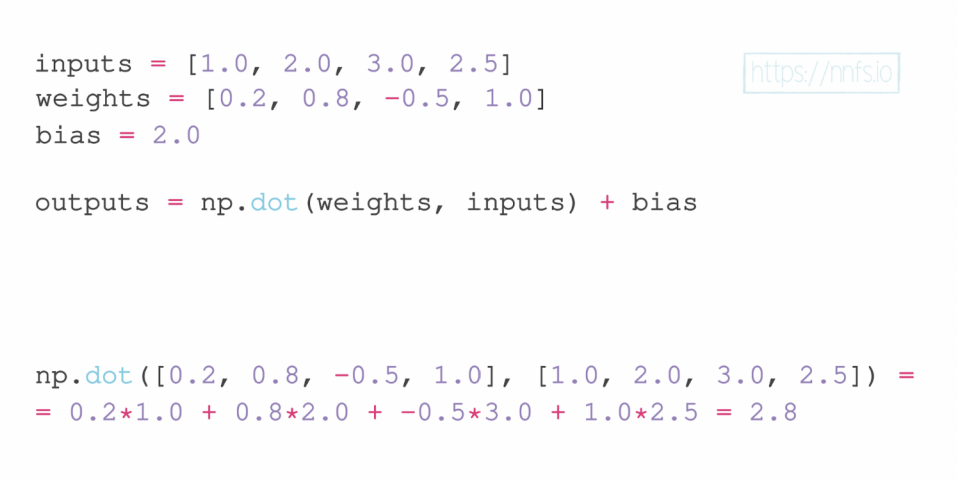

In [3]:
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

In [4]:
nnfs.init()

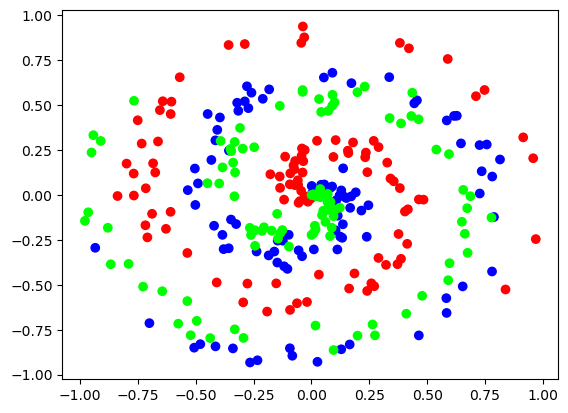

In [5]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

## The Dense Layer

In [6]:
import numpy as np

In [7]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [8]:
nnfs.init()

n_inputs = 2
n_neurons = 4

weights = 0.01 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros((1, n_neurons))

print(weights)
print(biases)

[[ 0.01764052  0.00400157  0.00978738  0.02240893]
 [ 0.01867558 -0.00977278  0.00950088 -0.00151357]]
[[0. 0. 0. 0.]]


In [9]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Perform a forward pass of our training data through this layer
dense1.forward(X)

print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.24927217e-04 -1.13383176e-04 -7.44427671e-05]
 [ 2.47531279e-04 -2.27871249e-04 -1.49413201e-04]
 [ 3.48339119e-04 -2.17201712e-04 -1.48695675e-04]
 [ 5.06213692e-04 -3.67755594e-04 -2.47095915e-04]]


## ReLU

In [10]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [11]:
# Create a dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Make a forward pass of our trdaining data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

In [12]:
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.0963125e-05 1.3451021e-04 0.0000000e+00]
 [6.0708160e-05 2.7026830e-04 0.0000000e+00]
 [9.2264498e-05 4.0423145e-04 0.0000000e+00]
 [1.0457915e-04 5.4344902e-04 0.0000000e+00]]


In [13]:
class Activation_Softmax:
    def forward(self, inputs):

        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

In [14]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output features
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features
# (as we take output of previous layer here) and 3 output values
dense2 = Layer_Dense(3,3)

# Create softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

# Let's see output of the first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333388 0.33333263 0.3333335 ]
 [0.33333465 0.33333188 0.3333335 ]
 [0.3333354  0.33333114 0.3333334 ]
 [0.33333623 0.33333045 0.33333334]]


## Categorical Cross-Entropy Loss

In [15]:
import math

In [16]:
# An example output from the output layer of the neural network
softmax_output = [0.7, 0.1, 0.2]
# Ground truth
target_output = [1, 0, 0]
loss = -(math.log(softmax_output[0])*target_output[0] +
math.log(softmax_output[1])*target_output[1] +
math.log(softmax_output[2])*target_output[2])
print(loss)

0.35667494393873245


In [17]:
softmax_outputs = np.array(
    [[0.7,0.1,0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]]
)

class_targets = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0]
    ]
)

# Probabilities for target values
if (len(class_targets.shape) == 1):
    correct_confidences = softmax_ouputs[
    range(len(softmax_ouputs)),
    class_targets
    ]
# Mask values - only for one-hot encoded labels
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
    softmax_outputs * class_targets,
    axis=1
    )
# Losses
neg_log = -np.log(correct_confidences)
average_loss = np.mean(neg_log)
print(average_loss)

0.38506088005216804


## The Categorical Cross-Entropy Loss Class

In [18]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) 
        # Ensure any of the probabilities is neither 0 or 1

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis =1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [19]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [20]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])
# Perform a forward pass through loss function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.3333336  0.3333337  0.3333327 ]
 [0.33333367 0.3333338  0.33333248]
 [0.33333433 0.33333454 0.33333117]
 [0.33333465 0.33333492 0.33333036]]
loss: 1.0986074


## Accuracy Calculation

In [21]:

softmax_outputs = np.array([[0.7, 0.2, 0.1],
[0.5, 0.1, 0.4],
[0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions==class_targets)
print('acc:', accuracy)

acc: 0.6666666666666666


## Optimization

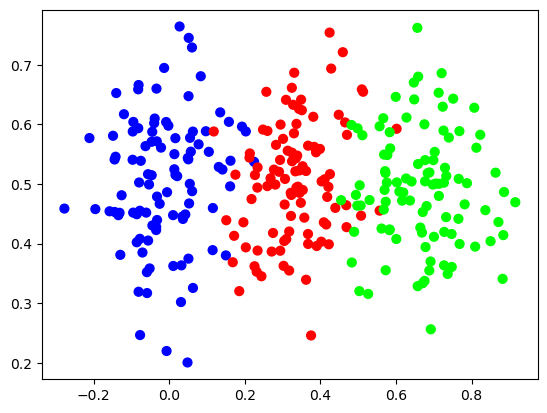

In [22]:
from nnfs.datasets import vertical_data

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:, 0], X[:,1], c=y, s=40, cmap='brg')
plt.show()

In [23]:
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [24]:
for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0999894 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987108 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0984782 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0982147 acc: 0.3333333333333333
New set of weights found, iteration: 30 loss: 1.0981847 acc: 0.3333333333333333
New set of weights found, iteration: 59 loss: 1.096803 acc: 0.43
New set of weights found, iteration: 1961 loss: 1.0963213 acc: 0.43666666666666665
New set of weights found, iteration: 3937 loss: 1.0957412 acc: 0.54


In [25]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
        'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1009662 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0985084 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0983543 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0969672 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.094848 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0900092 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.08756 acc: 0.6633333333333333
New set of weights found, iteration: 22 loss: 1.0859649 acc: 0.6666666666666666
New set of weights found, iteration: 25 loss: 1.0845935 acc: 0.6433333333333333
New set of weights found, iteration: 27 loss: 1.0838565 acc: 0.5966666666666667
New set of weights found, iteration: 28 loss: 1.0777475 acc: 0.6366666666666667
New set of weights found, iteration: 29 loss: 1.072762 acc: 0.43666666666666665
New set of weights found, iteration: 30 loss: 

In [127]:
# Relu activation
class Activation_ReLU:     
    # Forward pass
    def forward(self, inputs, training):
        # Remember input values
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable
        # Let's make a copy of the values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

    # Prediction
    def predictions(self, outputs):
        return outputs

In [27]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # To generate weights and biases

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

In [28]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis =1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We will use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if (len(y_true.shape) == 1):
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [29]:
class Activation_Softmax:
    def forward(self, inputs):

        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    def backward(self, dvalues):
        # Create uninitiated array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):

            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

In [30]:
softmax_output = [0.7, 0.1, 0.2]

softmax_output = np.array(softmax_output).reshape(-1,1)
print(softmax_output)

[[0.7]
 [0.1]
 [0.2]]


In [31]:
np.eye(softmax_output.shape[0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [32]:
print(softmax_output * np.eye(softmax_output.shape[0]))

[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]


In [33]:
print(np.diagflat(softmax_output))

[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]


In [34]:
print(np.diagflat(softmax_output) -
np.dot(softmax_output, softmax_output.T))

[[ 0.20999999 -0.07       -0.14      ]
 [-0.07        0.09       -0.02      ]
 [-0.14       -0.02        0.16      ]]


In [128]:
class Activation_Softmax:
    def forward(self, inputs, training):
        self.inputs = inputs

        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

    def backward(self, dvalues):
        # Create uninitiated array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):

            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return np.argmax(outputs, axis=1)

In [36]:
# Softmax classifier - confined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [37]:
softmax_outputs = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])
class_targets = np.array([0, 1, 1])

softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs
activation = Activation_Softmax()
activation.output = softmax_outputs
loss = Loss_CategoricalCrossentropy()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs

print('Gradients: combined loss and activation:')
print(dvalues1)
print('Gradients: separate loss and activation:')
print(dvalues2)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


In [38]:
def f1():
    softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues1 = softmax_loss.dinputs
    
def f2():
    activation = Activation_Softmax()
    activation.output = softmax_outputs
    loss = Loss_CategoricalCrossentropy()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues2 = activation.dinputs

In [39]:
from timeit import timeit
t1 = timeit(lambda: f1(), number=10000)
t2 = timeit(lambda: f2(), number=10000)
print(t2/t1)

4.754292787328405


In [40]:
X

array([[-0.12840883,  0.615265  ],
       [ 0.03291322,  0.4813326 ],
       [-0.10361152,  0.43436453],
       [ 0.16713518,  0.609903  ],
       [-0.02169467,  0.57979476],
       [ 0.01037281,  0.5112471 ],
       [-0.04407402,  0.38701212],
       [-0.03328667,  0.572016  ],
       [-0.01969561,  0.658033  ],
       [-0.2074682 ,  0.3165986 ],
       [ 0.03632343,  0.4423013 ],
       [ 0.02999258,  0.49995825],
       [ 0.11195234,  0.7635898 ],
       [-0.0046738 ,  0.4420622 ],
       [-0.10089443,  0.43367073],
       [-0.04943015,  0.47117218],
       [-0.08883275,  0.54716545],
       [ 0.07425829,  0.5958917 ],
       [ 0.10415988,  0.3681516 ],
       [ 0.00584178,  0.4845941 ],
       [-0.1044687 ,  0.60669535],
       [-0.08821879,  0.5289961 ],
       [ 0.01022072,  0.5298334 ],
       [ 0.20741343,  0.5692641 ],
       [-0.04676594,  0.59971744],
       [ 0.13457297,  0.4008448 ],
       [-0.05548648,  0.5119889 ],
       [ 0.06380167,  0.6057949 ],
       [ 0.07830442,

In [41]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y)

# Let's see output of the first few samples:
print(loss_activation.output[:5])
# Print loss value
print('loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333316 0.33333346 0.33333337]
 [0.33333308 0.33333337 0.33333355]
 [0.33333334 0.3333335  0.33333316]
 [0.3333327  0.33333355 0.3333337 ]]
loss: 1.0986125


In [42]:
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)
# Print accuracy
print('acc:', accuracy)

acc: 0.32666666666666666


In [43]:
# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)
# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[ 9.0386995e-05 -6.2987623e-05 -9.0600661e-05]
 [ 6.5710614e-05 -1.3292138e-06 -1.4941744e-04]]
[[ 0.00023912  0.00033788 -0.00033401]]
[[ 5.42603775e-05 -1.73461565e-04  1.19201184e-04]
 [ 5.79647822e-05 -3.47200985e-05 -2.32446855e-05]
 [ 5.94565172e-05 -1.09873094e-04  5.04165728e-05]]
[[ 9.7090378e-08  2.0593870e-07 -6.7357905e-07]]


## Optimizers

### Stochastic Gradient Descent (SGD)

In [44]:
class Optimizer_SGD:

    # Initialize optimizer - set settings
    # learning rate of 1.0 is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += - self.learning_rate * layer.dbiases

In [45]:
optimizer = Optimizer_SGD()

In [46]:
optimizer.update_params(dense1)

In [47]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()

dense1.forward(X)

activation1.forward(dense1.output)

dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y)

print('loss:', loss)

predictions = np.argmax(loss_activation.output, axis=1)

if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)

print('acc:', accuracy)

loss: 1.0986106
acc: 0.31666666666666665


In [48]:
# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Update weights and biases
optimizer.update_params(dense1)
optimizer.update_params(dense2)

### Epoch

In [49]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 64)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_SGD()

for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through this activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)


    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.303, loss: 1.099
epoch: 100, acc: 0.447, loss: 1.070
epoch: 200, acc: 0.433, loss: 1.062
epoch: 300, acc: 0.450, loss: 1.060
epoch: 400, acc: 0.467, loss: 1.059
epoch: 500, acc: 0.453, loss: 1.057
epoch: 600, acc: 0.437, loss: 1.055
epoch: 700, acc: 0.443, loss: 1.051
epoch: 800, acc: 0.440, loss: 1.043
epoch: 900, acc: 0.377, loss: 1.051
epoch: 1000, acc: 0.397, loss: 1.032
epoch: 1100, acc: 0.433, loss: 1.016
epoch: 1200, acc: 0.463, loss: 1.005
epoch: 1300, acc: 0.447, loss: 0.998
epoch: 1400, acc: 0.430, loss: 0.993
epoch: 1500, acc: 0.427, loss: 0.980
epoch: 1600, acc: 0.487, loss: 0.976
epoch: 1700, acc: 0.443, loss: 0.998
epoch: 1800, acc: 0.463, loss: 0.960
epoch: 1900, acc: 0.503, loss: 0.945
epoch: 2000, acc: 0.507, loss: 0.918
epoch: 2100, acc: 0.517, loss: 0.901
epoch: 2200, acc: 0.543, loss: 0.894
epoch: 2300, acc: 0.507, loss: 0.882
epoch: 2400, acc: 0.500, loss: 0.883
epoch: 2500, acc: 0.547, loss: 0.847
epoch: 2600, acc: 0.580, loss: 0.817
epoch: 2700, 

### Learning rate

In [50]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(learning_rate=0.85)

# Train in loop
for epoch in range(10001):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through this activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through this second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.303, loss: 1.099
epoch: 100, acc: 0.443, loss: 1.081
epoch: 200, acc: 0.457, loss: 1.064
epoch: 300, acc: 0.450, loss: 1.062
epoch: 400, acc: 0.453, loss: 1.060
epoch: 500, acc: 0.457, loss: 1.058
epoch: 600, acc: 0.463, loss: 1.055
epoch: 700, acc: 0.457, loss: 1.052
epoch: 800, acc: 0.463, loss: 1.049
epoch: 900, acc: 0.483, loss: 1.045
epoch: 1000, acc: 0.487, loss: 1.039
epoch: 1100, acc: 0.483, loss: 1.031
epoch: 1200, acc: 0.437, loss: 1.024
epoch: 1300, acc: 0.420, loss: 1.022
epoch: 1400, acc: 0.420, loss: 1.018
epoch: 1500, acc: 0.437, loss: 1.012
epoch: 1600, acc: 0.430, loss: 1.012
epoch: 1700, acc: 0.500, loss: 1.009
epoch: 1800, acc: 0.457, loss: 1.006
epoch: 1900, acc: 0.510, loss: 0.998
epoch: 2000, acc: 0.453, loss: 1.048
epoch: 2100, acc: 0.487, loss: 0.985
epoch: 2200, acc: 0.490, loss: 0.996
epoch: 2300, acc: 0.520, loss: 0.964
epoch: 2400, acc: 0.500, loss: 0.942
epoch: 2500, acc: 0.547, loss: 0.936
epoch: 2600, acc: 0.540, loss: 0.930
epoch: 2700, 

### Learning Rate Decay

In [51]:
starting_learning_rate = 1.0
learning_rate_decay = 0.1
step = 1

learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))

print(learning_rate)

0.9090909090909091


In [52]:
starting_learning_rate = 1.
learning_rate_decay = 0.1
step = 20
learning_rate = starting_learning_rate * \
(1. / (1 + learning_rate_decay * step))
print(learning_rate)

0.3333333333333333


In [53]:
starting_learning_rate = 1.
learning_rate_decay = 0.1
for step in range(20):
    learning_rate = starting_learning_rate * \
    (1. / (1 + learning_rate_decay * step))
    print(learning_rate)

1.0
0.9090909090909091
0.8333333333333334
0.7692307692307692
0.7142857142857143
0.6666666666666666
0.625
0.588235294117647
0.5555555555555556
0.5263157894736842
0.5
0.47619047619047616
0.45454545454545453
0.4347826086956522
0.41666666666666663
0.4
0.3846153846153846
0.37037037037037035
0.35714285714285715
0.3448275862068965


In [54]:
class Optimizer_SGD:

    # Initialize optimizer - set settings
    # learning rate of 1.0 is default for this optimizer
    def __init__(self, learning_rate=1.0, decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += - self.learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [55]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
optimizer = Optimizer_SGD(decay=1e-2)
# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}, ' +
        f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.300, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.407, loss: 1.073, lr: 0.5025125628140703
epoch: 200, acc: 0.417, loss: 1.066, lr: 0.33444816053511706
epoch: 300, acc: 0.420, loss: 1.064, lr: 0.2506265664160401
epoch: 400, acc: 0.407, loss: 1.062, lr: 0.2004008016032064
epoch: 500, acc: 0.413, loss: 1.059, lr: 0.1669449081803005
epoch: 600, acc: 0.413, loss: 1.058, lr: 0.14306151645207438
epoch: 700, acc: 0.417, loss: 1.054, lr: 0.1251564455569462
epoch: 800, acc: 0.450, loss: 1.046, lr: 0.11123470522803114
epoch: 900, acc: 0.440, loss: 1.035, lr: 0.10010010010010009
epoch: 1000, acc: 0.407, loss: 1.022, lr: 0.09099181073703366
epoch: 1100, acc: 0.417, loss: 1.007, lr: 0.08340283569641367
epoch: 1200, acc: 0.440, loss: 0.987, lr: 0.07698229407236336
epoch: 1300, acc: 0.450, loss: 0.967, lr: 0.07147962830593281
epoch: 1400, acc: 0.487, loss: 0.947, lr: 0.066711140760507
epoch: 1500, acc: 0.510, loss: 0.926, lr: 0.06253908692933083
epoch: 1600, acc: 0.523, loss: 0.918, lr: 0

In [56]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
optimizer = Optimizer_SGD(decay=1e-3)
# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}, ' +
        f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.320, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.437, loss: 1.069, lr: 0.9099181073703367
epoch: 200, acc: 0.437, loss: 1.057, lr: 0.8340283569641367
epoch: 300, acc: 0.440, loss: 1.056, lr: 0.7698229407236336
epoch: 400, acc: 0.437, loss: 1.055, lr: 0.7147962830593281
epoch: 500, acc: 0.437, loss: 1.053, lr: 0.66711140760507
epoch: 600, acc: 0.447, loss: 1.051, lr: 0.6253908692933083
epoch: 700, acc: 0.457, loss: 1.046, lr: 0.5885815185403178
epoch: 800, acc: 0.470, loss: 1.039, lr: 0.5558643690939411
epoch: 900, acc: 0.477, loss: 1.028, lr: 0.526592943654555
epoch: 1000, acc: 0.477, loss: 1.012, lr: 0.5002501250625312
epoch: 1100, acc: 0.537, loss: 0.996, lr: 0.4764173415912339
epoch: 1200, acc: 0.463, loss: 1.003, lr: 0.45475216007276037
epoch: 1300, acc: 0.440, loss: 1.001, lr: 0.43497172683775553
epoch: 1400, acc: 0.470, loss: 0.984, lr: 0.4168403501458941
epoch: 1500, acc: 0.437, loss: 1.018, lr: 0.4001600640256102
epoch: 1600, acc: 0.477, loss: 0.982, lr: 0.38476337

### SGD with momentum

In [57]:
# Update parameters
def update_params(self, layer):
    # If we use momentum
    if self.momentum:
    # If layer does not contain momentum arrays, create them
        # filled with zeros
        if not hasattr(layer, 'weight_momentums'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            # If there is no momentum array for weights
            # The array doesn't exist for biases yet either.
            layer.bias_momentums = np.zeros_like(layer.biases)
            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with
            # current gradients
            weight_updates = \
            self.momentum * layer.weight_momentums - \
            self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            # Build bias updates
            bias_updates = \
            self.momentum * layer.bias_momentums - \
            self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * \
            layer.dweights
            bias_updates = -self.current_learning_rate * \
            layer.dbiases
            # Update weights and biases using either
            # vanilla or momentum updates
            layer.weights += weight_updates
            layer.biases += bias_updates

In [58]:
# SGD optimizer
class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If we use momentum
        if self.momentum:
            # If layer does not contain momentum arrays, create them filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum
            weight_updates = self.momentum * layer.weight_momentums - \
                             self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates with momentum
            bias_updates = self.momentum * layer.bias_momentums - \
                           self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            # Vanilla SGD updates (no momentum)
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [59]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
optimizer = Optimizer_SGD(decay=1e-3, momentum=0.9)

# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
                       # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}, ' +
        f'lr: {optimizer.current_learning_rate}')
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.303, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.460, loss: 1.012, lr: 0.9099181073703367
epoch: 200, acc: 0.470, loss: 0.920, lr: 0.8340283569641367
epoch: 300, acc: 0.610, loss: 0.783, lr: 0.7698229407236336
epoch: 400, acc: 0.650, loss: 0.678, lr: 0.7147962830593281
epoch: 500, acc: 0.667, loss: 0.627, lr: 0.66711140760507
epoch: 600, acc: 0.687, loss: 0.599, lr: 0.6253908692933083
epoch: 700, acc: 0.693, loss: 0.580, lr: 0.5885815185403178
epoch: 800, acc: 0.707, loss: 0.563, lr: 0.5558643690939411
epoch: 900, acc: 0.700, loss: 0.529, lr: 0.526592943654555
epoch: 1000, acc: 0.690, loss: 0.519, lr: 0.5002501250625312
epoch: 1100, acc: 0.693, loss: 0.511, lr: 0.4764173415912339
epoch: 1200, acc: 0.707, loss: 0.505, lr: 0.45475216007276037
epoch: 1300, acc: 0.703, loss: 0.501, lr: 0.43497172683775553
epoch: 1400, acc: 0.713, loss: 0.496, lr: 0.4168403501458941
epoch: 1500, acc: 0.703, loss: 0.493, lr: 0.4001600640256102
epoch: 1600, acc: 0.703, loss: 0.490, lr: 0.38476337

### AdaGrad

In [60]:
# Adagrad optimizer
class Optimizer_Adagrad:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=1.0, decay=0, eps=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.eps = eps

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeroes
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # Vanilla SGD paramter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.eps)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.eps)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [61]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
#optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
optimizer = Optimizer_Adagrad(decay=1e-4)
# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}, ' +
        f'lr: {optimizer.current_learning_rate}')
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.227, loss: 1.099, lr: 1.0
epoch: 100, acc: 0.517, loss: 0.927, lr: 0.9901970492127933
epoch: 200, acc: 0.540, loss: 0.886, lr: 0.9804882831650161
epoch: 300, acc: 0.533, loss: 0.851, lr: 0.9709680551509855
epoch: 400, acc: 0.637, loss: 0.777, lr: 0.9616309260505818
epoch: 500, acc: 0.650, loss: 0.723, lr: 0.9524716639679969
epoch: 600, acc: 0.683, loss: 0.690, lr: 0.9434852344560807
epoch: 700, acc: 0.663, loss: 0.665, lr: 0.9346667912889054
epoch: 800, acc: 0.690, loss: 0.643, lr: 0.9260116677470135
epoch: 900, acc: 0.697, loss: 0.627, lr: 0.9175153683824203
epoch: 1000, acc: 0.710, loss: 0.607, lr: 0.9091735612328392
epoch: 1100, acc: 0.720, loss: 0.588, lr: 0.9009820704567978
epoch: 1200, acc: 0.730, loss: 0.578, lr: 0.892936869363336
epoch: 1300, acc: 0.717, loss: 0.603, lr: 0.8850340738118416
epoch: 1400, acc: 0.727, loss: 0.561, lr: 0.8772699359592947
epoch: 1500, acc: 0.730, loss: 0.548, lr: 0.8696408383337683
epoch: 1600, acc: 0.733, loss: 0.540, lr: 0.86214328

### RMSProp

In [62]:
# RMSprop optimizer
class Optimizer_RMSprop:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0, eps=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.eps = eps
        self.rho = rho

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeroes
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        # Vanilla SGD paramter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.eps)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.eps)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [63]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
#optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
optimizer = Optimizer_RMSprop(decay=1e-4)
# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}, ' +
        f'lr: {optimizer.current_learning_rate}')
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.287, loss: 1.099, lr: 0.001
epoch: 100, acc: 0.427, loss: 1.076, lr: 0.0009901970492127933
epoch: 200, acc: 0.440, loss: 1.067, lr: 0.0009804882831650162
epoch: 300, acc: 0.440, loss: 1.058, lr: 0.0009709680551509856
epoch: 400, acc: 0.477, loss: 1.046, lr: 0.0009616309260505818
epoch: 500, acc: 0.487, loss: 1.031, lr: 0.0009524716639679969
epoch: 600, acc: 0.493, loss: 1.016, lr: 0.0009434852344560807
epoch: 700, acc: 0.490, loss: 1.001, lr: 0.0009346667912889054
epoch: 800, acc: 0.517, loss: 0.986, lr: 0.0009260116677470135
epoch: 900, acc: 0.553, loss: 0.970, lr: 0.0009175153683824203
epoch: 1000, acc: 0.563, loss: 0.955, lr: 0.0009091735612328393
epoch: 1100, acc: 0.573, loss: 0.940, lr: 0.0009009820704567978
epoch: 1200, acc: 0.580, loss: 0.925, lr: 0.0008929368693633361
epoch: 1300, acc: 0.577, loss: 0.912, lr: 0.0008850340738118417
epoch: 1400, acc: 0.597, loss: 0.900, lr: 0.0008772699359592947
epoch: 1500, acc: 0.587, loss: 0.888, lr: 0.0008696408383337683
epoc

### Adam

In [64]:
class Optimizer_Adam:
    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):
        # If layer does not contain cache arrays,
        # create them filled with zeroes
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))
    
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))
    
        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
        weight_momentums_corrected / \
        (np.sqrt(weight_cache_corrected) +
        self.epsilon)
        layer.biases += -self.current_learning_rate * \
        bias_momentums_corrected / \
        (np.sqrt(bias_cache_corrected) +
        self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [65]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)
# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Create optimizer
#optimizer = Optimizer_SGD(decay=8e-8, momentum=0.9)
optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)
# Train in loop
for epoch in range(10001):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
        f'acc: {accuracy:.3f}, ' +
        f'loss: {loss:.3f}, ' +
        f'lr: {optimizer.current_learning_rate}')
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.350, loss: 1.099, lr: 0.02
epoch: 100, acc: 0.600, loss: 0.901, lr: 0.01998021958261321
epoch: 200, acc: 0.710, loss: 0.705, lr: 0.019960279044701046
epoch: 300, acc: 0.730, loss: 0.605, lr: 0.019940378268975763
epoch: 400, acc: 0.743, loss: 0.546, lr: 0.01992051713662487
epoch: 500, acc: 0.753, loss: 0.508, lr: 0.01990069552930875
epoch: 600, acc: 0.767, loss: 0.482, lr: 0.019880913329158343
epoch: 700, acc: 0.783, loss: 0.462, lr: 0.019861170418772778
epoch: 800, acc: 0.800, loss: 0.445, lr: 0.019841466681217078
epoch: 900, acc: 0.810, loss: 0.431, lr: 0.01982180200001982
epoch: 1000, acc: 0.830, loss: 0.416, lr: 0.019802176259170884
epoch: 1100, acc: 0.833, loss: 0.395, lr: 0.01978258934311912
epoch: 1200, acc: 0.837, loss: 0.379, lr: 0.01976304113677013
epoch: 1300, acc: 0.843, loss: 0.360, lr: 0.019743531525483964
epoch: 1400, acc: 0.860, loss: 0.325, lr: 0.01972406039507293
epoch: 1500, acc: 0.877, loss: 0.297, lr: 0.019704627631799327
epoch: 1600, acc: 0.883, lo

### Training with out-of-sample data

In [66]:
# Validate the model
# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)
# Perform a forward pass of our testing data through this layer
dense1.forward(X_test)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.823, loss: 1.143


### L1 and L2 Regularization

In [67]:
# Dense layer
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, weight_regularizer_l1=0,
                 weight_regularizer_l2=0, bias_regularizer_l1=0, bias_regularizer_l2=0):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # Set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradient on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

In [110]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses
    def regularization_loss(self):
        # 0 by default
        regularization_loss = 0

        # Calculate regularization loss
        # itrate all trainable layers
        for layer in self.trainable_layers:
        
            # L1 regularization - weights
            # calculate only when factor greater than 0
            if layer.weight_regularizer_l1 > 0:
                regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
    
            # L2 regularization - weights
            if layer.weight_regularizer_l2 > 0:
                regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
    
            # L1 regularization - biases
            # calculate only when factor greater than 0
            if layer.bias_regularizer_l1 > 0:
                regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
            # L2 regularization - biases
            if layer.bias_regularizer_l2 > 0:
                regularization_loss += layer.bias_regularizer_l2 * np.sum(np.abs(layer.biases * layer.biases))
    
        return regularization_loss

    # Set/remember trainable layers
    def remember_trainable_layers(self, trainable_layers):
        self.trainable_layers = trainable_layers
    
    # given model output and ground truth values
    def calculate(self, output, y, *, include_regularization=False):
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # If just data loss - return it
        if not include_regularization:
            return data_loss

        # Return loss and regularization loss
        return data_loss, self.regularization_loss()

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7) 
        # Ensure any of the probabilities is neither 0 or 1

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis =1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We will use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [76]:
# # Create dataset
# X, y = spiral_data(samples=100, classes=3)
# # Create Dense layer with 2 input features and 64 output values
# dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
# bias_regularizer_l2=5e-4)
# # Create ReLU activation (to be used with Dense layer):
# activation1 = Activation_ReLU()
# # Create second Dense layer with 64 input features (as we take output
# # of previous layer here) and 3 output values (output values)
# dense2 = Layer_Dense(64, 3)
# # Create Softmax classifier's combined loss and activation
# loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# # Create optimizer
# optimizer = Optimizer_Adam(learning_rate=0.02, decay=5e-7)
# # Train in loop
# for epoch in range(10001):
#     # Perform a forward pass of our training data through this layer
#     dense1.forward(X)
#     # Perform a forward pass through activation function
#     # takes the output of first dense layer here
#     activation1.forward(dense1.output)
#     # Perform a forward pass through second Dense layer
#     # takes outputs of activation function of first layer as inputs
#     dense2.forward(activation1.output)
#     # Perform a forward pass through the activation/loss function
#     # takes the output of second dense layer here and returns loss
#     data_loss = loss_activation.forward(dense2.output, y)
#     # Calculate regularization penalty
#     regularization_loss = \
#     loss_activation.loss.regularization_loss(dense1) + \
#     loss_activation.loss.regularization_loss(dense2)
#     # Calculate overall loss
#     loss = data_loss + regularization_loss
#     # Calculate accuracy from output of activation2 and targets
#     # calculate values along first axis
#     predictions = np.argmax(loss_activation.output, axis=1)
#     if len(y.shape) == 2:
#         y = np.argmax(y, axis=1)
#     accuracy = np.mean(predictions==y)
#     if not epoch % 100:
#         print(f'epoch: {epoch}, ' +
#         f'acc: {accuracy:.3f}, ' +
#         f'loss: {loss:.3f} (' +
#         f'data_loss: {data_loss:.3f}, ' +
#         f'reg_loss: {regularization_loss:.3f}), ' +
#         f'lr: {optimizer.current_learning_rate}')
#     # Backward pass
#     loss_activation.backward(loss_activation.output, y)
#     dense2.backward(loss_activation.dinputs)
#     activation1.backward(dense2.dinputs)
#     dense1.backward(activation1.dinputs)
#     # Update weights and biases
#     optimizer.pre_update_params()
#     optimizer.update_params(dense1)
#     optimizer.update_params(dense2)
#     optimizer.post_update_params()

### Dropout

In [77]:
import random

dropout_rate = 0.5

example_output = [0.27, -1.03, 0.67, 0.99, 0.05, -0.37, -2.01, 1.13, -0.07, 0.73]

while True:
    index = random.randint(0, len(example_output) - 1)
    example_output[index] = 0

    dropped_out = 0
    for value in example_output:
        if value == 0:
            dropped_out += 1

    if dropped_out / len(example_output) >= dropout_rate:
        break
print(example_output)

[0, -1.03, 0.67, 0.99, 0, 0, 0, 1.13, 0, 0.73]


In [78]:
np.random.binomial(3, 0.5, size=10)

array([2, 2, 1, 1, 2, 2, 2, 0, 1, 0])

In [79]:
dropout_rate = 0.20
np.random.binomial(1, 1-dropout_rate, size=5)

array([0, 1, 1, 1, 0])

In [80]:
dropout_rate = 0.3
example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.06, 0.37, -2.01, 1.13, -0.07, 0.74])

example_output *= np.random.binomial(1, 1-dropout_rate, example_output.shape)
print(example_output)

[ 0.   -0.    0.67  0.    0.    0.   -0.    0.   -0.07  0.74]


In [81]:
dropout_rate = 0.2
example_output = np.array([0.27, -1.03, 0.67, 0.99, 0.05,
-0.37, -2.01, 1.13, -0.07, 0.73])
print(f'sum initial {sum(example_output)}')
sums = []
for i in range(10000):
    example_output2 = example_output * \
    np.random.binomial(1, 1-dropout_rate, example_output.shape) / \
    (1-dropout_rate)
    sums.append(sum(example_output2))
print(f'mean sum: {np.mean(sums)}')

sum initial 0.36000000000000015
mean sum: 0.3783287500000002


In [82]:
# Dropout
class Layer_Dropout:
    # init
    def __init__(self, rate):
        # Store rate, we invert it as for example for dropout
        # of 0.1 we need success rate of 0.9
        self.rate = 1 - rate

    # Forward pass
    def forward(self, inputs):
        # Save input values
        self.inputs = inputs
        # Generate and save scaled mask
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate

        # Apply mask to output values
        self.output = inputs * self.binary_mask

    # Backward pass
    def backward(self, dvalues):
        # Gradient on values
        self.dinputs = dvalues * self.binary_mask

In [84]:
# # Create dataset
# X, y = spiral_data(samples=1000, classes=3)
# # Create Dense layer with 2 input features and 64 output values
# dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
# bias_regularizer_l2=5e-4)
# # Create ReLU activation (to be used with Dense layer):
# activation1 = Activation_ReLU()
# # Create dropout layer
# dropout1 = Layer_Dropout(0.1)
# # Create second Dense layer with 64 input features (as we take output
# # of previous layer here) and 3 output values (output values)
# dense2 = Layer_Dense(64, 3)
# # Create Softmax classifier's combined loss and activation
# loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# # Create optimizer
# optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)
# # Train in loop
# for epoch in range(10001):
#     # Perform a forward pass of our training data through this layer
#     dense1.forward(X)
#     # Perform a forward pass through activation function
#     # takes the output of first dense layer here
#     activation1.forward(dense1.output)
#     # Perform a forward pass through Dropout layer
#     dropout1.forward(activation1.output)
#     # Perform a forward pass through second Dense layer
#     # takes outputs of activation function of first layer as inputs
#     dense2.forward(dropout1.output)
#     # Perform a forward pass through the activation/loss function
#     # takes the output of second dense layer here and returns loss
#     data_loss = loss_activation.forward(dense2.output, y)
#     # Calculate regularization penalty
#     regularization_loss = \
#     loss_activation.loss.regularization_loss(dense1) + \
#     loss_activation.loss.regularization_loss(dense2)
#     # Calculate overall loss
#     loss = data_loss + regularization_loss
#     # Calculate accuracy from output of activation2 and targets
#     # calculate values along first axis
#     predictions = np.argmax(loss_activation.output, axis=1)
#     if len(y.shape) == 2:
#         y = np.argmax(y, axis=1)
#     accuracy = np.mean(predictions==y)
#     if not epoch % 100:
#         print(f'epoch: {epoch}, ' +
#         f'acc: {accuracy:.3f}, ' +
#         f'loss: {loss:.3f} (' +
#         f'data_loss: {data_loss:.3f}, ' +
#         f'reg_loss: {regularization_loss:.3f}), ' +
#         f'lr: {optimizer.current_learning_rate}')
#         # Backward pass
#     loss_activation.backward(loss_activation.output, y)
#     dense2.backward(loss_activation.dinputs)
#     dropout1.backward(dense2.dinputs)
#     activation1.backward(dropout1.dinputs)
#     dense1.backward(activation1.dinputs)
#     # Update weights and biases
#     optimizer.pre_update_params()
#     optimizer.update_params(dense1)
#     optimizer.update_params(dense2)
#     optimizer.post_update_params()

In [85]:
# # Create dataset
# X, y = spiral_data(samples=1000, classes=3)
# # Create Dense layer with 2 input features and 64 output values
# # Create Dense layer with 2 input features and 512 output values
# dense1 = Layer_Dense(2, 512, weight_regularizer_l2=5e-4,
# bias_regularizer_l2=5e-4)
# # Create ReLU activation (to be used with Dense layer):
# activation1 = Activation_ReLU()
# # Create dropout layer
# dropout1 = Layer_Dropout(0.1)
# # Create second Dense layer with 64 input features (as we take output
# # of previous layer here) and 3 output values (output values)
# dense2 = Layer_Dense(512, 3)
# # Create Softmax classifier's combined loss and activation
# loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# # Create optimizer
# optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-5)
# # Train in loop
# for epoch in range(10001):
#     # Perform a forward pass of our training data through this layer
#     dense1.forward(X)
#     # Perform a forward pass through activation function
#     # takes the output of first dense layer here
#     activation1.forward(dense1.output)
#     # Perform a forward pass through Dropout layer
#     dropout1.forward(activation1.output)
#     # Perform a forward pass through second Dense layer
#     # takes outputs of activation function of first layer as inputs
#     dense2.forward(dropout1.output)
#     # Perform a forward pass through the activation/loss function
#     # takes the output of second dense layer here and returns loss
#     data_loss = loss_activation.forward(dense2.output, y)
#     # Calculate regularization penalty
#     regularization_loss = \
#     loss_activation.loss.regularization_loss(dense1) + \
#     loss_activation.loss.regularization_loss(dense2)
#     # Calculate overall loss
#     loss = data_loss + regularization_loss
#     # Calculate accuracy from output of activation2 and targets
#     # calculate values along first axis
#     predictions = np.argmax(loss_activation.output, axis=1)
#     if len(y.shape) == 2:
#         y = np.argmax(y, axis=1)
#     accuracy = np.mean(predictions==y)
#     if not epoch % 100:
#         print(f'epoch: {epoch}, ' +
#         f'acc: {accuracy:.3f}, ' +
#         f'loss: {loss:.3f} (' +
#         f'data_loss: {data_loss:.3f}, ' +
#         f'reg_loss: {regularization_loss:.3f}), ' +
#         f'lr: {optimizer.current_learning_rate}')
#         # Backward pass
#     loss_activation.backward(loss_activation.output, y)
#     dense2.backward(loss_activation.dinputs)
#     dropout1.backward(dense2.dinputs)
#     activation1.backward(dropout1.dinputs)
#     dense1.backward(activation1.dinputs)
#     # Update weights and biases
#     optimizer.pre_update_params()
#     optimizer.update_params(dense1)
#     optimizer.update_params(dense2)
#     optimizer.post_update_params()

### Sigmoid Function Code

In [129]:
# Sigmoid activation
class Activation_Sigmoid:
    # Forward pass
    def forward(self, inputs, training):
        # Save input and calculate/save output
        # of the sigmoid function
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    # Backward pass
    def backward(self, dvalues):
        # Derivative - calculates from output of the sigmoid function
        self.dinputs = dvalues * (1 - self.output) * self.output

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return (outputs > 0.5) * 1

In [87]:
# Binary cross-entropy loss
class Loss_BinaryCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Calculate sample-wise loss
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)

        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)
        # Calculate gradient
        self.dinputs = -(y_true / clipped_dvalues -
        (1 - y_true) / (1 - clipped_dvalues)) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [89]:
# # Create dataset
# X, y = spiral_data(samples=100, classes=2)
# # Reshape labels to be a list of lists
# # Inner list contains one output (either 0 or 1)
# # per each output neuron, 1 in this case
# y = y.reshape(-1, 1)
# # Create Dense layer with 2 input features and 64 output values
# dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
# bias_regularizer_l2=5e-4)
# # Create ReLU activation (to be used with Dense layer):
# activation1 = Activation_ReLU()
# # Create second Dense layer with 64 input features (as we take output
# # of previous layer here) and 1 output value
# dense2 = Layer_Dense(64, 1)
# # Create Sigmoid activation:
# activation2 = Activation_Sigmoid()
# # Create loss function
# loss_function = Loss_BinaryCrossentropy()
# # Create optimizer
# optimizer = Optimizer_Adam(decay=5e-7)
# # Train in loop
# for epoch in range(10001):
#     # Perform a forward pass of our training data through this layer
#     dense1.forward(X)
#     # Perform a forward pass through activation function
#     # takes the output of first dense layer here
#     activation1.forward(dense1.output)
#     # Perform a forward pass through second Dense layer
#     # takes outputs of activation function
#     # of first layer as inputs
#     dense2.forward(activation1.output)
#     # Perform a forward pass through activation function
#     # takes the output of second dense layer here
#     activation2.forward(dense2.output)
#     # Calculate the data loss
#     data_loss = loss_function.calculate(activation2.output, y)
#     # Calculate regularization penalty
#     regularization_loss = \
#     loss_function.regularization_loss(dense1) + \
#     loss_function.regularization_loss(dense2)
#     # Calculate overall loss
#     loss = data_loss + regularization_loss
#     # Calculate accuracy from output of activation2 and targets
#     # Part in the brackets returns a binary mask - array consisting
#     # of True/False values, multiplying it by 1 changes it into array
#     # of 1s and 0s
#     predictions = (activation2.output > 0.5) * 1
#     accuracy = np.mean(predictions==y)
#     if not epoch % 100:
#         print(f'epoch: {epoch}, ' +
#         f'acc: {accuracy:.3f}, '+
#         f'loss: {loss:.3f} (' +
#         f'data_loss: {data_loss:.3f}, ' +
#         f'reg_loss: {regularization_loss:.3f}), ' +
#         f'lr: {optimizer.current_learning_rate}')
#     # Backward pass
#     loss_function.backward(activation2.output, y)
#     activation2.backward(loss_function.dinputs)
#     dense2.backward(activation2.dinputs)
#     activation1.backward(dense2.dinputs)
#     dense1.backward(activation1.dinputs)
#     # Update weights and biases
#     optimizer.pre_update_params()
#     optimizer.update_params(dense1)
#     optimizer.update_params(dense2)
#     optimizer.post_update_params()

## Regression

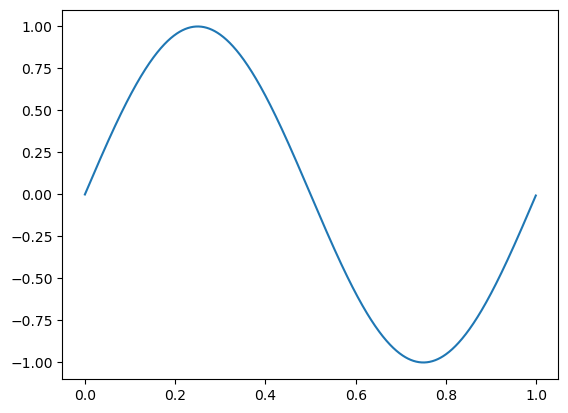

In [90]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import sine_data
nnfs.init()

X, y = sine_data()

plt.plot(X, y)
plt.show()

In [130]:
# Linear activation
class Activation_Linear:
    # Forward pass
    def forward(self, inputs, training):
        # Just remember values
        self.inputs = inputs
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        self.dinputs = dvalues.copy()

    # Calculate predictions for outputs
    def predictions(self, outputs):
        return outputs

In [92]:
# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):
        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We will use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normlaize gradient
        self.dinputs = self.dinputs / samples

In [93]:
# Mean Absolute Error loss
class Loss_MeanAbsoluteError(Loss):
    def forward(self, y_pred, y_true):
        sample_losses = np.mean(np.abs(y_pred - y_true), axis=-1)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We will use the first sammple to count them
        outputs = len(dvalues[0])

        # Calculate gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [94]:
# # Create dataset
# X, y = sine_data()

# # Create Dense layer with 1 input feature and 64 output values
# dense1 = Layer_Dense(1, 64)

# # Create ReLU activation (to be used with Dense Layer):
# activation1 = Activation_ReLU()

# # Create second Dense layer with 64 input features (as we take output
# # of previous layer here) and 1 output value
# dense2 = Layer_Dense(64, 1)
# # Create Linear activation:
# activation2 = Activation_Linear()

# # Create loss function
# loss_function = Loss_MeanSquaredError()

# # Create optimizer
# optimizer = Optimizer_Adam()

# # Accuracy precision for accuracy calculation
# # There are no really accuracy factor for regression problem,
# # but we can simulate/approximate it. We will calculate it by checking
# # how many values have a difference to their ground truth equivalent
# # less than given precision
# # We will calculate this precision as a fraction of std
# # of all the ground truth values
# accuracy_precision = np.std(y) / 250

# # Train in loop
# for epoch in range(10001):
#     # Perform a forward pass of our training data through this layer
#     dense1.forward(X)
#     # Perform a forward pass through activation function
#     # takes the output of first dense layer here
#     activation1.forward(dense1.output)
#     # Perform a forward pass through second Dense layer
#     # takes outputs of activation function
#     # of first layer as inputs
#     dense2.forward(activation1.output)
#     # Perform a forward pass through activation function
#     # takes the output of second dense layer here
#     activation2.forward(dense2.output)
#     # Calculate the data loss
#     data_loss = loss_function.calculate(activation2.output, y)
#     # Calculate regularization penalty
#     regularization_loss = \
#     loss_function.regularization_loss(dense1) + \
#     loss_function.regularization_loss(dense2)
#     # Calculate overall loss
#     loss = data_loss + regularization_loss
#     # Calculate accuracy from output of activation2 and targets
#     # To calculate it we're taking absolute difference between
#     # predictions and ground truth values and compare if differences
#     # are lower than given precision value
#     predictions = activation2.output
#     accuracy = np.mean(np.absolute(predictions - y) <
#     accuracy_precision)
#     if not epoch % 100:
#         print(f'epoch: {epoch}, ' +
#         f'acc: {accuracy:.3f}, ' +
#         f'loss: {loss:.3f} (' +
#         f'data_loss: {data_loss:.3f}, ' +
#         f'reg_loss: {regularization_loss:.3f}), ' +
#         f'lr: {optimizer.current_learning_rate}')
#     # Backward pass
#     loss_function.backward(activation2.output, y)
#     activation2.backward(loss_function.dinputs)
#     dense2.backward(activation2.dinputs)
#     activation1.backward(dense2.dinputs)
#     dense1.backward(activation1.dinputs)

#     # Update weights and biases
#     optimizer.pre_update_params()
#     optimizer.update_params(dense1)
#     optimizer.update_params(dense2)
#     optimizer.post_update_params()

## Model Object

In [134]:
# Model class
class Model:
    def __init__(self):
        # Create a list of network objects
        self.layers = []

    # Add objects to the model
    def add(self, layer):
        self.layers.append(layer)

    # Set loss and optimizer
    def set(self, *, loss, optimizer, accuracy):
        self.loss = loss
        self.optimizer = optimizer
        self.accuracy = accuracy

    # Train the model
    def train(self, X, y, *, epochs=1, print_every=1, validation_data=None):
        # Initialize accuracy object
        self.accuracy.init(y)
        
        # Main training loop
        for epoch in range(1, epochs + 1):
            # Perform the forward pass
            output = self.forward(X, training=True)

            # Calculate loss
            data_loss, regularization_loss = self.loss.calculate(output, y)
            loss = data_loss + regularization_loss

            # Get predictions and calculate accuracy
            predictions = self.output_layer_activation.predictions(output)
            accuracy = self.accuracy.calculate(predictions, y)

            # Perform backward pass
            self.backward(output, y)

            # Optimize (update parameters)
            self.optimizer.pre_update_params()
            for layer in self.trainable_layers:
                self.optimizer.update_params(layer)
            self.optimizer.post_update_params()

            # Print a summary
            if not epoch % print_every:
                print(f'epoch: {epoch}, ' +
                      f'acc: {accuracy:.3f}, ' +
                      f'loss: {loss:.3f} (' +
                      f'data_loss: {data_loss:.3f}, ' +
                      f'reg_loss: {regularization_loss:.3f}), ' +
                      f'lr: {self.optimizer.current_learning_rate}')

        # If there is the validation data
        if validation_data is not None:
            # For better readability
            X_val, y_val = validation_data
            # Perform the forward pass
            output = self.forward(X_val, training=False)
            # Calculate the loss
            loss = self.loss.calculate(output, y_val)
            # Get predictions and calculate an accuracy
            predictions = self.output_layer_activation.predictions(
            output)
            accuracy = self.accuracy.calculate(predictions, y_val)
            # Print a summary
            print(f'validation, ' +
            f'acc: {accuracy:.3f}, ' +
            f'loss: {loss:.3f}')

    # Finalize the model
    def finalize(self):
        # Create and set the input layer
        self.input_layer = Layer_Input()

        # Count all the objects
        layer_count = len(self.layers)

        # Initialize a list containing trainable layers
        self.trainable_layers = []

        # Iterate the objects
        for i in range(layer_count):

            # Connect layers
            if i == 0:
                self.layers[i].prev = self.input_layer
                self.layers[i].next = self.layers[i + 1]
            elif i < layer_count - 1:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.layers[i + 1]
            else:
                self.layers[i].prev = self.layers[i - 1]
                self.layers[i].next = self.loss

            # Add to trainable layers if it has weights
            if hasattr(self.layers[i], 'weights'):
                self.trainable_layers.append(self.layers[i])

        # Update loss object with trainable layers
        self.loss.remember_trainable_layers(self.trainable_layers)

        # Set the output activation layer (last layer)
        self.output_layer_activation = self.layers[-1]

    # Performs forward pass
    def forward(self, X):
        # Call forward method on the input layer
        self.input_layer.forward(X)

        # Forward pass through each layer
        for layer in self.layers:
            layer.forward(layer.prev.output)

        return self.layers[-1].output

    # Performs backward pass
    def backward(self, output, y):
        # If softmax classifier
        if self.softmax_classifier_output is not None:
            # First call backward method
            # on the combined activation/loss
            # this will set dinputs property
            self.softmax_classifier_output.backward(output, y)
            # Since we'll not call backward method of the last layer
            # which is Softmax activation
            # as we used combined activation/loss
            # object, let's set dinputs in this object
            self.layers[-1].dinputs = \
            self.softmax_classifier_output.dinputs
            # Call backward method going through
            # all the objects but last
            # in reversed order passing dinputs as a parameter
            for layer in reversed(self.layers[:-1]):
                layer.backward(layer.next.dinputs)
            return

In [114]:
# Input 'layer'
class Layer_Input:
    # Forward pass
    def forward(self, inputs, training):
        self.output = inputs

In [100]:
# Common accuracy class
class Accuracy:
    # Calculates an accuracy
    # given predictions and ground truth values
    def calculate(self, predictions, y):
        # Get comparision results
        comparisons = self.compare(predictions, y)
        # Calculate an accuracy
        accuracy = np.mean(comparisons)
        # Retrun accuracy
        return accuracy

In [101]:
# Accuracy calculation for regression model
class Accuracy_Regression(Accuracy):
    def __init__(self):
        # Create precision property
        self.precision = None

    # Calculate precision value
    # baed on passed in ground truth
    def init(self, y, reinit=False):
        if self.precision is None or reinit:
            self.precision = np.std(y) / 250

    # Compare predictions to the ground truth values
    def compare(self, predictions, y):
        return np.absolute(predictions - y) < self.precision

In [113]:
# Accuracy calculation for classification model
class Accuracy_Categorical(Accuracy):
    # No initialization is needed
    def init(self, y):
        pass
    # Compares predictions to the ground truth values
    def compare(self, predictions, y):
        if len(y.shape) == 2:
            y = np.argmax(y, axis=1)
        return predictions == y